<a href="https://colab.research.google.com/github/asrivasSW/AI-CLASS/blob/main/IA_taller2_corte2/Taller2_segundo_corte_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER II SEGUNDO CORTE_IA

INTEGRANTES:
             

*   ANDRES STEVEN RIVAS SALAS
              
*   KEVIN JOSEPH VALBUENA PÉREZ

*   RUBEN DARIO BARAHONA

## Librerías a utilizar

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew, kurtosis, norm
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_datasetestu = pd.read_excel('/content/drive/MyDrive/kaggle/Dataset_Estudiantes.xlsx')

## Puntos a realizar

### 1. Calcula el sesgo (skewness) y la curtosis (kurtosis) de la columna Nota.

In [4]:
#Cargar dataset

df = df_datasetestu

In [20]:
#Calcular Sesgo y Kurtosis
sesgo = skew(df['Notas'])
curtosis_val = kurtosis(df['Notas'])

In [21]:
#Imprimir resultados
print("Sesgo:", sesgo)
print("Curtosis:", curtosis_val)

Sesgo: -0.24568369158663012
Curtosis: -1.1433391065973297


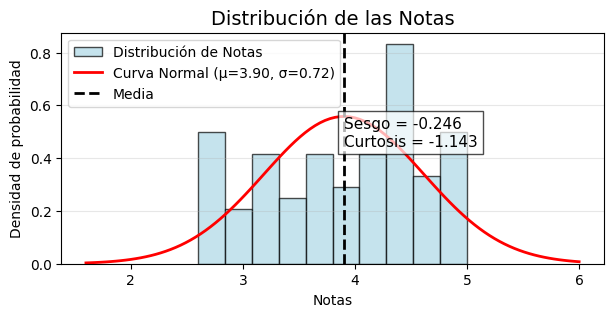

In [34]:
#Graficar resultados

# Calcular media y desviación estándar
mu = df['Notas'].mean()
sigma = df['Notas'].std()

# Crear histograma con curva normal
plt.figure(figsize=(7,3))
count, bins, ignored = plt.hist(df['Notas'], bins=10, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Distribución de Notas')

# Curva normal teórica
x = np.linspace(min(df['Notas'])-1, max(df['Notas'])+1, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2, label=f'Curva Normal (μ={mu:.2f}, σ={sigma:.2f})')

# Línea de la media
plt.axvline(mu, color='black', linestyle='--', linewidth=2, label='Media')

# Texto descriptivo de sesgo y curtosis
plt.text(mu, max(norm.pdf(x, mu, sigma))*0.8,
         f"Sesgo = {sesgo:.3f}\nCurtosis = {curtosis_val:.3f}",
         fontsize=11, bbox=dict(facecolor='white', alpha=0.7))

# Etiquetas y título
plt.title("Distribución de las Notas", fontsize=14)
plt.xlabel("Notas")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


### **Interpretación:**

*   Si el sesgo > 0, la distribución es asimétrica a la derecha
*   Si sesgo < 0, es asimétrica a la izquierda.




* Curtosis > 0 indica una distribución más apuntada que la normal;
* Curtosis < 0, más plana.

<br>

Por lo cual se podría decir que estamos ante un grafico, donde el sesgo tiene una asimetría negativa, con una kurtosis platicúrtica.

<br>
<br>
<br>

### 2. Calcula la correlación y covarianza entre las columnas Edad y Nota.

<br>



In [47]:
# Calcular correlación y covarianza
correlacion = df[['Edad', 'Notas']].corr().iloc[0, 1]
covarianza = np.cov(df['Edad'], df['Notas'])[0, 1]

In [49]:
print("correlación:\n\n", correlacion)
print("\ncovarianza:\n\n", covarianza)

correlación:

 0.046556774631871245

covarianza:

 0.098818181818182


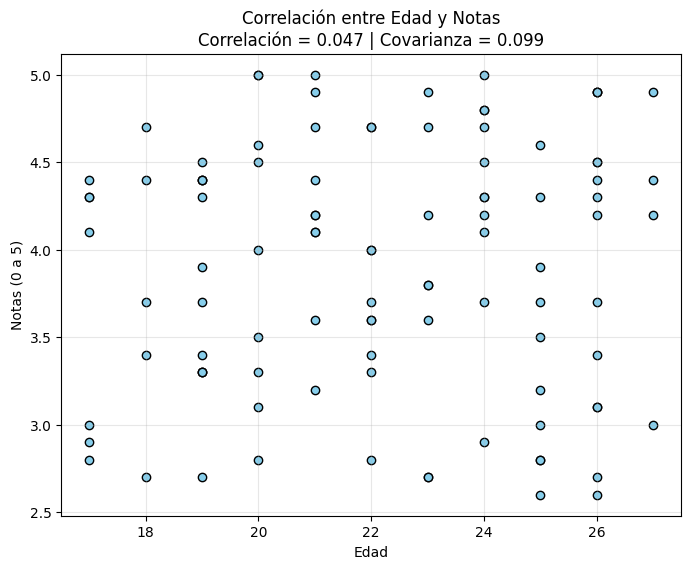

In [50]:
#Graficar resultados

# Crear gráfico de dispersión
plt.figure(figsize=(8,6))
plt.scatter(df['Edad'], df['Notas'], color='skyblue', edgecolor='black')
plt.title(f"Correlación entre Edad y Notas\nCorrelación = {correlacion:.3f} | Covarianza = {covarianza:.3f}")
plt.xlabel("Edad")
plt.ylabel("Notas (0 a 5)")
plt.grid(True, alpha=0.3)
plt.show()


### **Interpretación**

Cada punto representa un estudiante (edad en el eje X y nota en el eje Y).

La relación entre ambas variables te permite observar si las notas aumentan, disminuyen o no cambian con la edad.

Es decir que:

La Correlación sería positiva sí: las notas tienden a subir con la edad.

La Correlación sería negativa sí: las notas tienden a bajar con la edad.

Si esta es cercana a 0: no hay relación lineal clara.  

<br>

Por lo anterior podríamos decir que en este caso, no hay una relación lineal clara.

<br>
<br>

### 3. Verifica si la columna Nota proviene de una distribución normal utilizando el test de Shapiro-Wilk.

In [52]:
#Calcular nota, utilizando el test de shapiro-wilk
stat, p = stats.shapiro(df['Notas'])

In [58]:
#Imprimir resultados
print("Estadístico:\n", stat)
print("\np-valor:\n", p)

if p < 0.05:
    print("Los datos NO provienen de una distribución normal (se rechaza H₀)")
else:
    print("No se puede rechazar H₀: los datos podrían ser normales.")

Estadístico:
 0.9431409334905577

p-valor:
 0.00030125759154374143
Los datos NO provienen de una distribución normal (se rechaza H₀)


### Interpretación:
El test comprueba si las notas se distribuyen normalmente.
Un p-valor bajo (< 0.05) indica que no hay normalidad.

### 4. Toma las columnas Edad (variable independiente X) y Nota (variable dependiente Y), y realiza lo siguiente:  

<br>

* Ajusta una recta de regresión lineal y grafica los puntos observados junto con la recta estimada.
* Calcula los residuos y el RMSD (Root Mean Square Deviation).

In [63]:
#Definir las variables para el modelo
X = df[['Edad']]
y = df['Notas']

#Crear y entrenar el modelo de regresión lineal
# Se crea una instancia del modelo y se ajusta con los datos
modelo = LinearRegression()
modelo.fit(X, y)

#Calcular las predicciones del modelo
# El modelo predice las notas estimadas (ŷ) para cada edad (x)
y_pred = modelo.predict(X)

#Calcular los residuos y medidas de ajuste
residuos = y - y_pred
rss = np.sum(residuos**2)
rmsd = np.sqrt(rss / (len(X) - 2))

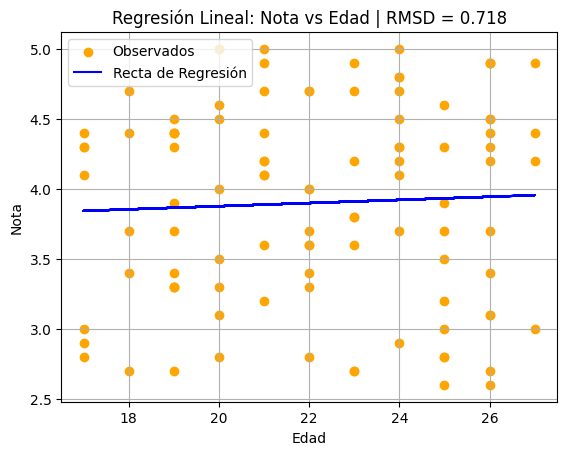

Pendiente (β₁): 0.011
Intercepto (β₀): 3.652
RMSD: 0.718


In [64]:
#Resultados y grafico
plt.scatter(X, y, color='orange', label='Observados')
plt.plot(X, y_pred, color='blue', label='Recta de Regresión')
plt.xlabel('Edad')
plt.ylabel('Nota')
plt.title(f'Regresión Lineal: Nota vs Edad | RMSD = {rmsd:.3f}')
plt.legend()
plt.grid(True)
plt.show()

print(f"Pendiente (β₁): {modelo.coef_[0]:.3f}")
print(f"Intercepto (β₀): {modelo.intercept_:.3f}")
print(f"RMSD: {rmsd:.3f}")

### **Interpretación:**

Si la pendiente (β₁) es positiva, las notas tienden a aumentar con la edad.

Si es negativa, las notas tienden a disminuir.

El RMSD mide qué tan dispersos están los datos reales respecto a la recta del modelo.

Cuanto menor sea el RMSD, mejor es el ajuste del modelo.